# Computational Finance
Trabalho de Grupo:
Student / Number_NOVA_IMS_CV

Anderlina Marcal / 20222015

Daniel Moreira / 20222023

Elizangela Fernandes / 20222029

João Carlos Fidalgo / 20222059 

#Grupo K

## 1 - (6.0 pts)  Cashfows de um Empréstimo

### 1.1) - (1.0 pts) Criar uma função em python para calcular prestações constantes (função PMT no excel)


$PMT = C \times \frac{i(1 + i)^n}{(1+i)^n-1}$


onde:
- $C$ é o capital inicial do empréstimo
- $i$ é a taxa não anualizada para o periodo (exemplo: para periodos mensais i=taxa anualizada / 12)
- $n$ é o número de períodos no empréstimo (example: para 10 anos e periodos mensais n = 10 x 12 = 120)

In [ ]:
## importe as bibliotecas necessárias
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns



In [1]:
## 1 - Cashfows de um Empréstimo

### 1.1) - Criar uma função em python para calcular prestações constantes de um empréstimo
#PMT = C * frac{i(1 + i)^n}{(1+i)^n-1}
#onde:
#- C é o capital inicial do empréstimo
#- i é a taxa não anualizada para o periodo (exemplo: para periodos mensais i=taxa anualizada / 12)
#- n é o número de períodos no empréstimo (examplo: para 10 anos e periodos mensais n = 10 x 12 = 120)

def pmt(c, i, n):
    return c * (i * (1 + i)**n) / ((1 + i)**n - 1)
    

### 1.2) - (3.0 pts) Criar um Pandas Dataframe que representa os cashflows de um empréstimo com as seguintes características

    - Capital: USD 500k
    - Inicio: 31-08-2020
    - Fim: 31-08-2050
    - Taxa annual: 1.2% 30/360
    - Frequeência: mensal



- As colunas do DataFrame devem ser: data, capital, juros, amortização, prestação
- As prestações são constantes ao longo de todo o empréstimo
- O juro do período é calculado como: capital x taxa anualizada / 12
- A amortização do período é calculada como: prestação - juro
- O capital do período é calculado como: capital do período anterior -  amortização do período anterior


In [11]:
"""
### 1.2) - Criar um Pandas Dataframe que representa os cashflows de um empréstimo com as seguintes características:

    - Capital: USD 500k
    - Inicio: 31-08-2020
    - Fim: 31-08-2050
    - Taxa annual: 1.2% (30/360)
    - Frequência: mensal

- As colunas do DataFrame devem ser: data, capital, juros, amortização, prestação
- As prestações são constantes ao longo de todo o empréstimo
- O juro do período é calculado como: capital x taxa anualizada / 12
- A amortização do período é calculada como: prestação - juro
- O capital do período é calculado como: capital do período anterior -  amortização do período anterior

"""

#definir variaveis

c = 500000
i = 0.012/12
# use datatime to calculate the exact date diference in months bissextile years

start_date = datetime(2020, 8, 31)
end_date = datetime(2050, 8, 31)
n  = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
print(f'Number of months (n): {n}')

pmt_MonthlyPayment = pmt(c, i, n)
print(f'PMT: {pmt_MonthlyPayment:.2f} USD')

# create a list of dates
dates = [start_date + timedelta(days=x) for x in range(0, n*30, 30)]
print(f'Number of dates: {len(dates)}')

# create a list of interest
interest = [c * i for x in range(0, n)]
print(f'Number of interest: {len(interest)}')

# create a list of amortization
amortization = [pmt_MonthlyPayment - x for x in interest]
print(f'Number of amortization: {len(amortization)}')

# create a list of capital
capital = [c - x for x in amortization]
print(f'Number of capital: {len(capital)}')

# create a list of monthly payment
monthly_payment = [pmt_MonthlyPayment for x in range(0, n)]
print(f'Number of monthly payment: {len(monthly_payment)}')

# create a dataframe
df = pd.DataFrame(list(zip(dates, capital, interest, amortization, monthly_payment)),
                columns =['Data', 'Capital', 'Juros', 'Amortização', 'Prestação_mensal'])
df


Number of months (n): 360
PMT: 1654.54 USD
Number of dates: 360
Number of interest: 360
Number of amortization: 360
Number of capital: 360
Number of monthly payment: 360


,Data,Capital,Juros,Amortização,Prestação_mensal
0,2020-08-31,498845.456529,500.0,1154.543471,1654.543471
1,2020-09-30,498845.456529,500.0,1154.543471,1654.543471
2,2020-10-30,498845.456529,500.0,1154.543471,1654.543471
3,2020-11-29,498845.456529,500.0,1154.543471,1654.543471
4,2020-12-29,498845.456529,500.0,1154.543471,1654.543471
...,...,...,...,...,...
355,2049-10-28,498845.456529,500.0,1154.543471,1654.543471
356,2049-11-27,498845.456529,500.0,1154.543471,1654.543471
357,2049-12-27,498845.456529,500.0,1154.543471,1654.543471
358,2050-01-26,498845.456529,500.0,1154.543471,1654.543471


### 1.3) - (2.pts) Cria um gŕafico de aŕea que representa ao mesmo tempo as amortizações e juros (Y) contra as datas (X)

- Dá o label do eixo Y como "Montante"
- Dá o label ao eixo X como "Data"

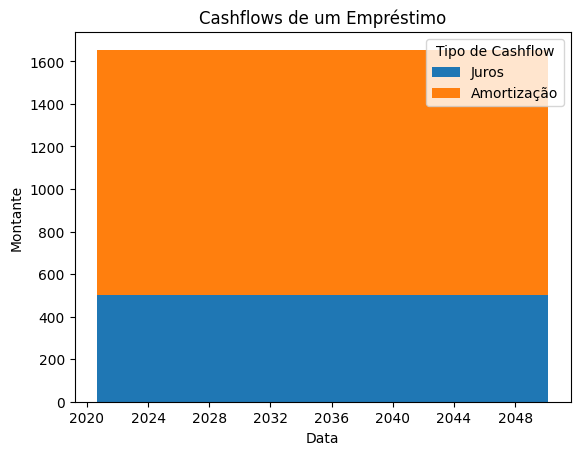

In [14]:
### 1.3) - (2.pts) Cria um gŕafico de aŕea que representa ao mesmo tempo as amortizações e juros (Y) contra as datas (X)
"""- Dá o label do eixo Y como "Montante"
- Dá o label ao eixo X como "Data"
- Dá o título ao gráfico como "Cashflows de um Empréstimo"
- Dá o label às linhas do gráfico como "Juros" e "Amortização"
- Dá o label à legenda como "Cashflows"
- Dá o label ao título da legenda como "Tipo de Cashflow"
"""

# plot the data
plt.stackplot(df['Data'], df['Juros'], df['Amortização'], labels=['Juros', 'Amortização'])

plt.title('Cashflows de um Empréstimo') # add a title
plt.xlabel('Data') # add x labels
plt.ylabel('Montante') # add y labels
plt.legend(title='Tipo de Cashflow') # add a legend

plt.show()

## 2 - (11.0 pts) Download de dados Financeiros

### 2.1) - (1.0 pts) Faz download dos components do índice PSI20 do seguinte url com o Pandas

https://en.wikipedia.org/wiki/PSI-20

In [121]:
#2 - Download de dados Financeiros
#2.1) - Faz download dos components do índice PSI20 do seguinte url com o Pandas https://en.wikipedia.org/wiki/PSI-20

url = 'https://en.wikipedia.org/wiki/PSI-20'
df = pd.read_html(url, header=0)[2]
df

,Company,Industry,Ticker,Weight (%)
0,Altri,Basic Resources,ALTR,2.03
1,Banco Comercial Português,Banks,BCP,17.04
2,Corticeira Amorim,Industrial Goods & Services,COR,2.62
3,CTT Correios de Portugal,Industrial Goods & Services,CTT,3.02
4,EDP Renováveis,Utilities,EDPR,9.69
5,Energias de Portugal,Utilities,EDP,10.36
6,Galp Energia,Energy,GALP,11.50
7,Ibersol,Travel & Leisure,IBS,0.93
8,Jerónimo Martins,"Personal Care, Drug & Grocery Stores",JMT,10.55
9,Mota-Engil,Construction & Materials,EGL,2.22


In [38]:
#drop SONC.ls because it is not available in Yahoo Finance
df.drop(df[df['Ticker'] == 'SONC'].index, inplace = True)
df

,Company,Industry,Ticker,Weight (%)
0,Altri,Basic Resources,ALTR,2.03
1,Banco Comercial Português,Banks,BCP,17.04
2,Corticeira Amorim,Industrial Goods & Services,COR,2.62
3,CTT Correios de Portugal,Industrial Goods & Services,CTT,3.02
4,EDP Renováveis,Utilities,EDPR,9.69
5,Energias de Portugal,Utilities,EDP,10.36
6,Galp Energia,Energy,GALP,11.50
7,Ibersol,Travel & Leisure,IBS,0.93
8,Jerónimo Martins,"Personal Care, Drug & Grocery Stores",JMT,10.55
9,Mota-Engil,Construction & Materials,EGL,2.22


### 2.2) - (1.0 pts) Como os tickers listados como "XXX" não têm a informação da bolsa a que se referem, usar list comprehension para adicionar ".LS" no final de cada ticker:

Ex: Passar de ["AAA", "BBB", "CCC"] para ["AAA.LS", "BBB.LS", "CCC.LS"]

In [39]:
# add ".ls" to the Ticker column to get the data from Yahoo Finance
df['Ticker'] = df['Ticker'] + '.ls'
df

,Company,Industry,Ticker,Weight (%)
0,Altri,Basic Resources,ALTR.ls,2.03
1,Banco Comercial Português,Banks,BCP.ls,17.04
2,Corticeira Amorim,Industrial Goods & Services,COR.ls,2.62
3,CTT Correios de Portugal,Industrial Goods & Services,CTT.ls,3.02
4,EDP Renováveis,Utilities,EDPR.ls,9.69
5,Energias de Portugal,Utilities,EDP.ls,10.36
6,Galp Energia,Energy,GALP.ls,11.50
7,Ibersol,Travel & Leisure,IBS.ls,0.93
8,Jerónimo Martins,"Personal Care, Drug & Grocery Stores",JMT.ls,10.55
9,Mota-Engil,Construction & Materials,EGL.ls,2.22


### 2.3) - (1.0 pts) Utilizar Yahoo Finance (yfinance) para fazer o download do dados de todos os tickers de 2012 até agora

In [71]:
"""
# 2.3) - Utilizar Yahoo Finance (yfinance) para fazer o download do dados de todos os tickers de 2012 até 30/11/2022
- Create one DataFrame with columns "Date, Adj Close, Close, High, Low, Open, Volume, Ticker" 
- Set the index as the date column
- Create a DataFrame called "returns" with the daily return of the the "close" column (Dates as index and ticker as columns)
- Make a horizontal plot with the returns histogram for each ticker.
""" 

# download data from Yahoo Finance
data = yf.download(df['Ticker'].tolist(), start="2012-01-01", end="2022-11-30")


[*********************100%***********************]  17 of 17 completed


           Adj Close                                                  \
             ALTR.LS    BCP.LS    COR.LS CTT.LS    EDP.LS    EDPR.LS   
Date                                                                   
2012-01-02  0.650747  0.676841  0.837549    NaN  1.246442   4.439066   
2012-01-03  0.676050  0.709972  0.831566    NaN  1.247962   4.398990   
2012-01-04  0.653497  0.624776  0.825584    NaN  1.251509   4.366371   
2012-01-05  0.639195  0.572712  0.807636    NaN  1.216041   4.380350   
2012-01-06  0.647446  0.643708  0.807636    NaN  1.218068   4.528536   
...              ...       ...       ...    ...       ...        ...   
2022-11-23  5.665000  0.152500  8.900000  3.215  4.481000  22.700001   
2022-11-24  5.525000  0.152800  8.850000  3.185  4.511000  22.920000   
2022-11-25  5.550000  0.155400  9.040000  3.185  4.477000  22.590000   
2022-11-28  5.455000  0.152100  9.000000  3.165  4.388000  22.150000   
2022-11-29  5.550000  0.152700  9.080000  3.180  4.420000  21.73

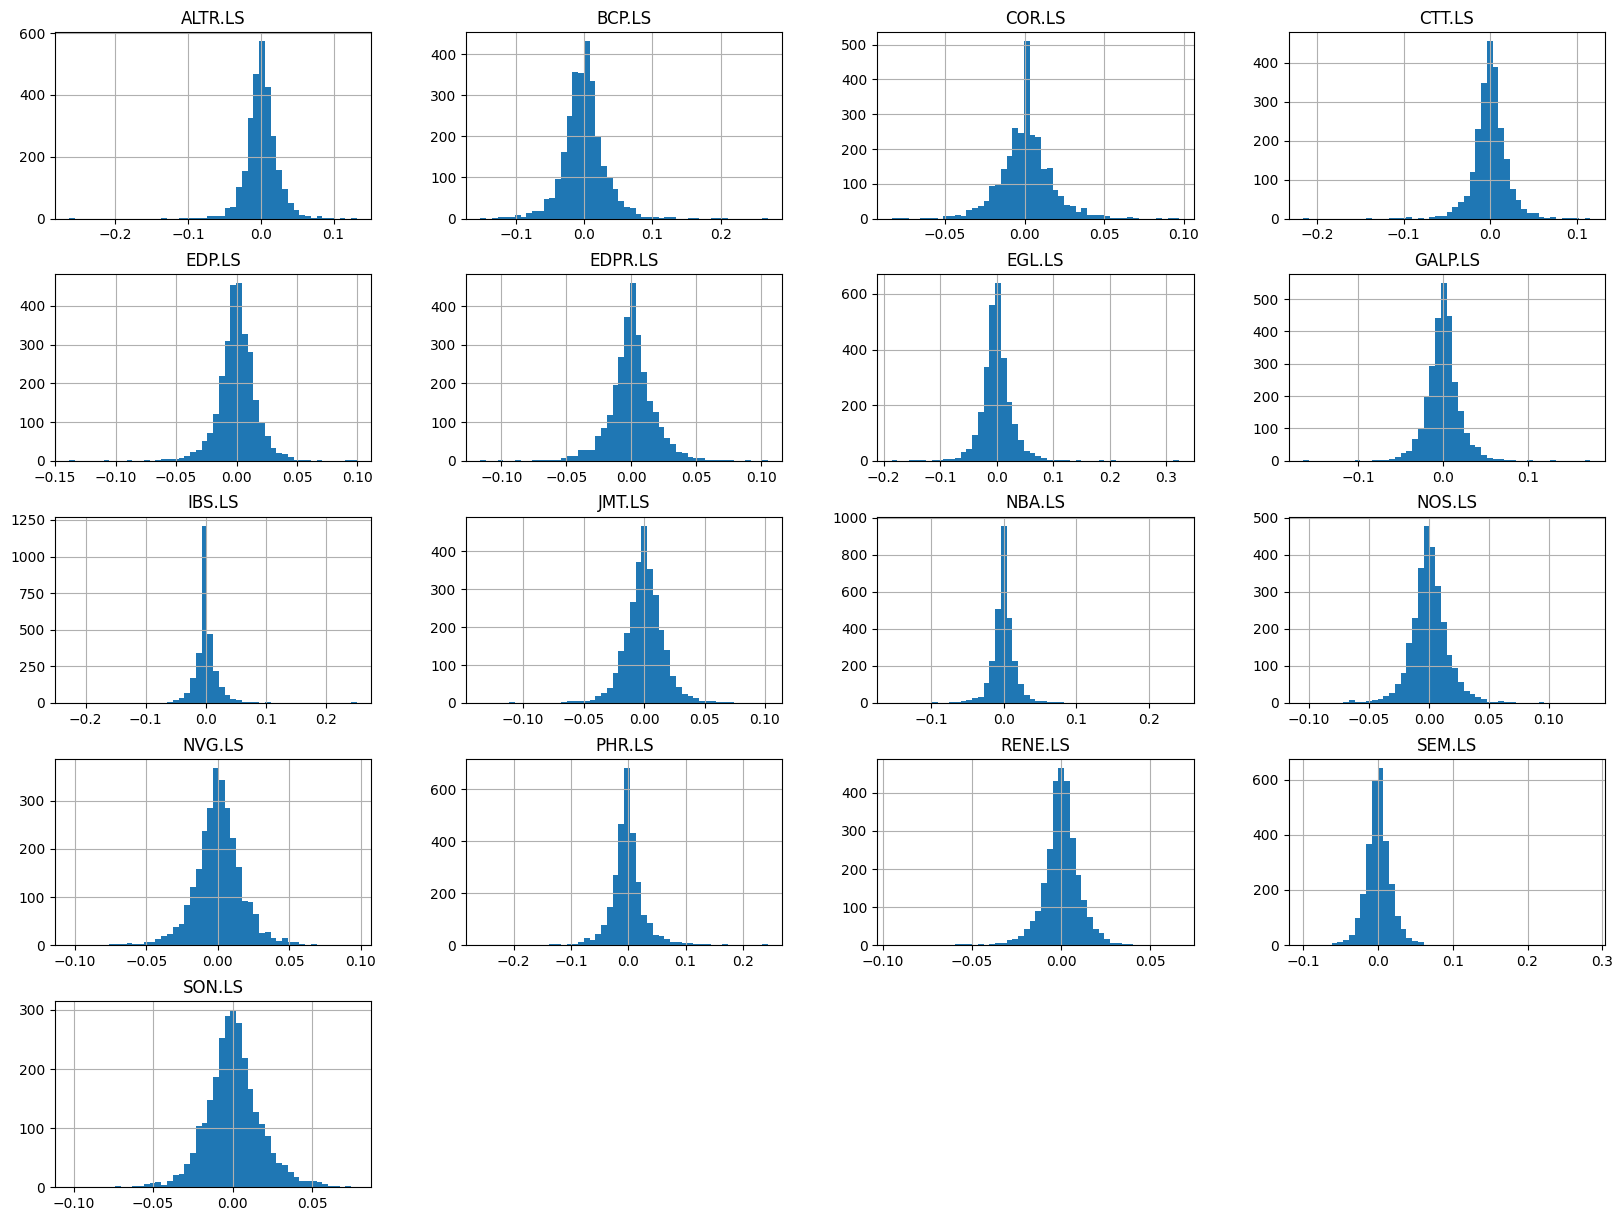

In [122]:
# create a dataframe with the data
df_data = pd.DataFrame(data)
print(df_data)

# create a dataframe with the returns
df_returns = df_data['Close'].pct_change()
print(df_returns)

# plot the returns
df_returns.hist(bins=50, figsize=(20,15))
plt.show()


### 2.4) - (1.0 pts) Eliminar as colunas que não têm preços desde 2012

In [74]:
#### 2.4) - Eliminar as colunas que não têm preços
# drop columns that don't have prices
df_data.dropna(axis=1, how='all', inplace=True)
df_data

Adj Close                                                  \
             ALTR.LS    BCP.LS    COR.LS CTT.LS    EDP.LS    EDPR.LS   
Date                                                                   
2012-01-02  0.650747  0.676841  0.837549    NaN  1.246442   4.439066   
2012-01-03  0.676050  0.709972  0.831566    NaN  1.247962   4.398990   
2012-01-04  0.653497  0.624776  0.825584    NaN  1.251509   4.366371   
2012-01-05  0.639195  0.572712  0.807636    NaN  1.216041   4.380350   
2012-01-06  0.647446  0.643708  0.807636    NaN  1.218068   4.528536   
...              ...       ...       ...    ...       ...        ...   
2022-11-23  5.665000  0.152500  8.900000  3.215  4.481000  22.700001   
2022-11-24  5.525000  0.152800  8.850000  3.185  4.511000  22.920000   
2022-11-25  5.550000  0.155400  9.040000  3.185  4.477000  22.590000   
2022-11-28  5.455000  0.152100  9.000000  3.165  4.388000  22.150000   
2022-11-29  5.550000  0.152700  9.080000  3.180  4.420000  21.730000   

                                                      ...   Volume         \
              EGL.LS    GALP.LS    IBS.LS     JMT.LS  ...  GALP.LS IBS.LS   
Date                                                  ...                   
2012-01-02  0.709814   7.575126  2.472377   9.153475  ...   271318      0   
2012-01-03  0.704406   7.978401  2.588079   9.223750  ...  1513397  16500   
2012-01-04  0.703730   7.936460  2.588079   9.135904  ...  1807950      0   
2012-01-05  0.699674   7.907425  2.557631   9.167530  ...  1012272  29749   
2012-01-06  0.706434   8.201012  2.557631   9.178071  ...  1442240      0   
...              ...        ...       ...        ...  ...      ...    ...   
2022-11-23  1.248000  11.400000  5.780000  21.020000  ...  2557175   8102   
2022-11-24  1.244000  11.560000  5.780000  21.240000  ...  1301411      0   
2022-11-25  1.250000  11.520000  5.700000  21.240000  ...  1617660     40   
2022-11-28  1.230000  11.465000  5.620000  21.420000  ...  2415985   3225   
2022-11-29  1.244000  11.590000  5.420000  21.340000  ...  2440503   1475   

                                                                              
            JMT.LS NBA.LS   NOS.LS   NVG.LS   PHR.LS RENE.LS SEM.LS   SON.LS  
Date                                                                          
2012-01-02  152170    800  4247035   143888   986607   73131  10988   650819  
2012-01-03  431782   5189   850346   213747  1789436  212535  33624  1813599  
2012-01-04  462349   5600   679348   193277  2050472  239416  52454  1009150  
2012-01-05  562794   7164   385766   191374  2256630  148922  75931  2692052  
2012-01-06  215578   6311   324121   198875  1203793  223629  30276  3295422  
...            ...    ...      ...      ...      ...     ...    ...      ...  
2022-11-23  603985    993   247515  1213456   407626  851173   9561  2030451  
2022-11-24  469955   2102   162507  1017045   504556  326401  10664  1916789  
2022-11-25  422330  10886   403925  1397468   605958  417975   4604  1599013  
2022-11-28  515014    892   246106   817913   358263  812159   6453  2058803  
2022-11-29  507484   2734   182847  1053189   295199  559403  31106  1362985  

[2794 rows x 102 columns]

In [78]:
#print NA values
df_data.isna().sum()

Adj Close  ALTR.LS      0
           BCP.LS       0
           COR.LS       0
           CTT.LS     494
           EDP.LS       0
                     ... 
Volume     NVG.LS       0
           PHR.LS       0
           RENE.LS      0
           SEM.LS       0
           SON.LS       0
Length: 102, dtype: int64

In [79]:
# drop rows that have NA values 
df_data.dropna(axis=0, how='any', inplace=True)
df_data



Adj Close                                                     \
             ALTR.LS    BCP.LS    COR.LS    CTT.LS    EDP.LS    EDPR.LS   
Date                                                                      
2013-12-05  1.423662  0.987724  1.614135  3.551051  1.586954   3.557543   
2013-12-06  1.443553  0.996536  1.600099  3.544641  1.576316   3.522722   
2013-12-09  1.417978  1.042802  1.614135  3.730526  1.589909   3.530250   
2013-12-10  1.370807  1.089067  1.607117  3.653608  1.588137   3.529309   
2013-12-11  1.358872  1.097879  1.600099  3.698477  1.576316   3.577308   
...              ...       ...       ...       ...       ...        ...   
2022-11-23  5.665000  0.152500  8.900000  3.215000  4.481000  22.700001   
2022-11-24  5.525000  0.152800  8.850000  3.185000  4.511000  22.920000   
2022-11-25  5.550000  0.155400  9.040000  3.185000  4.477000  22.590000   
2022-11-28  5.455000  0.152100  9.000000  3.165000  4.388000  22.150000   
2022-11-29  5.550000  0.152700  9.080000  3.180000  4.420000  21.730000   

                                                      ...   Volume         \
              EGL.LS    GALP.LS    IBS.LS     JMT.LS  ...  GALP.LS IBS.LS   
Date                                                  ...                   
2013-12-05  3.438284   7.887459  4.155571  10.628454  ...  2300839      0   
2013-12-06  3.561974   7.894247  4.136909  10.543368  ...  1350725    151   
2013-12-09  3.678620   7.880673  4.136909  10.746839  ...  1278756    750   
2013-12-10  3.583112   7.880673  4.136909  10.728342  ...  1355479    750   
2013-12-11  3.512655   7.928188  4.168013  10.580363  ...  1871549  13792   
...              ...        ...       ...        ...  ...      ...    ...   
2022-11-23  1.248000  11.400000  5.780000  21.020000  ...  2557175   8102   
2022-11-24  1.244000  11.560000  5.780000  21.240000  ...  1301411      0   
2022-11-25  1.250000  11.520000  5.700000  21.240000  ...  1617660     40   
2022-11-28  1.230000  11.465000  5.620000  21.420000  ...  2415985   3225   
2022-11-29  1.244000  11.590000  5.420000  21.340000  ...  2440503   1475   

                                                                              
            JMT.LS NBA.LS  NOS.LS   NVG.LS   PHR.LS RENE.LS  SEM.LS   SON.LS  
Date                                                                          
2013-12-05  557965   6419  734397   212811  3911292  156871  113168  6565052  
2013-12-06  648952   7423  379436    72229  3726446   70544   24867  3281577  
2013-12-09  563582  21840  472833    77878  2974699  278475  188360  2321901  
2013-12-10  499046  10135  553785   145170  3017922  114096   14089  2995881  
2013-12-11  488399  10063  424096   160762  3642731  157661   95285  2057487  
...            ...    ...     ...      ...      ...     ...     ...      ...  
2022-11-23  603985    993  247515  1213456   407626  851173    9561  2030451  
2022-11-24  469955   2102  162507  1017045   504556  326401   10664  1916789  
2022-11-25  422330  10886  403925  1397468   605958  417975    4604  1599013  
2022-11-28  515014    892  246106   817913   358263  812159    6453  2058803  
2022-11-29  507484   2734  182847  1053189   295199  559403   31106  1362985  

[2300 rows x 102 columns]

### 2.5) - (1.0 pts) Calcular um novo DataFrame só os os retornos utilizando a coluna "Adj Close"

$retorno = \frac{preço_t}{preço_{t-1}}  - 1 $


DICA: há uma função do pandas que faz este calculo diretamente

In [84]:
### 2.5 - Calcular um novo DataFrame só os os retornos utilizando a coluna "Adj Close"
#retorno = \frac{preço_t}{preço_{t-1}}  - 1 $

df_returns = df_data['Adj Close'].pct_change()
df_returns



,ALTR.LS,BCP.LS,COR.LS,CTT.LS,EDP.LS,EDPR.LS,EGL.LS,GALP.LS,IBS.LS,JMT.LS,NBA.LS,NOS.LS,NVG.LS,PHR.LS,RENE.LS,SEM.LS,SON.LS
Date,,,,,,,,,,,,,,,,,
2013-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-06,0.013972,0.008922,-0.008696,-0.001805,-0.006704,-0.009788,0.035975,0.000861,-0.004491,-0.008005,-0.010453,-0.000569,-0.016616,0.000000,-0.000450,-0.006032,-0.008580
2013-12-09,-0.017716,0.046426,0.008772,0.052441,0.008624,0.002137,0.032747,-0.001719,0.000000,0.019298,0.007042,-0.003415,0.010345,-0.003067,0.000000,0.021055,-0.000961
2013-12-10,-0.033266,0.044367,-0.004348,-0.020618,-0.001115,-0.000266,-0.025963,0.000000,0.000000,-0.001721,0.000000,0.006093,0.002048,0.009231,0.013514,0.004367,0.005775
2013-12-11,-0.008706,0.008091,-0.004367,0.012281,-0.007443,0.013600,-0.019663,0.006029,0.007519,-0.013793,0.000000,0.023467,-0.025886,0.000000,-0.006222,-0.007126,-0.014354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,0.021641,-0.003268,0.007927,-0.007716,-0.000223,0.022062,-0.004785,0.005291,0.028470,-0.004735,-0.004808,0.004578,0.012182,-0.005272,-0.001934,0.002817,0.006722
2022-11-24,-0.024713,0.001967,-0.005618,-0.009331,0.006695,0.009692,-0.003205,0.014035,0.000000,0.010466,0.014493,-0.007089,-0.008373,-0.017668,-0.003876,-0.009831,-0.007191
2022-11-25,0.004525,0.017016,0.021469,0.000000,-0.007537,-0.014398,0.004823,-0.003460,-0.013841,0.000000,0.000000,-0.015298,0.015303,0.003597,0.001946,0.009929,-0.003621


### 2.6) - (1.0 pts) Faz um gráfico com os retornos cumulaticos de todas as ações no mesmo plano

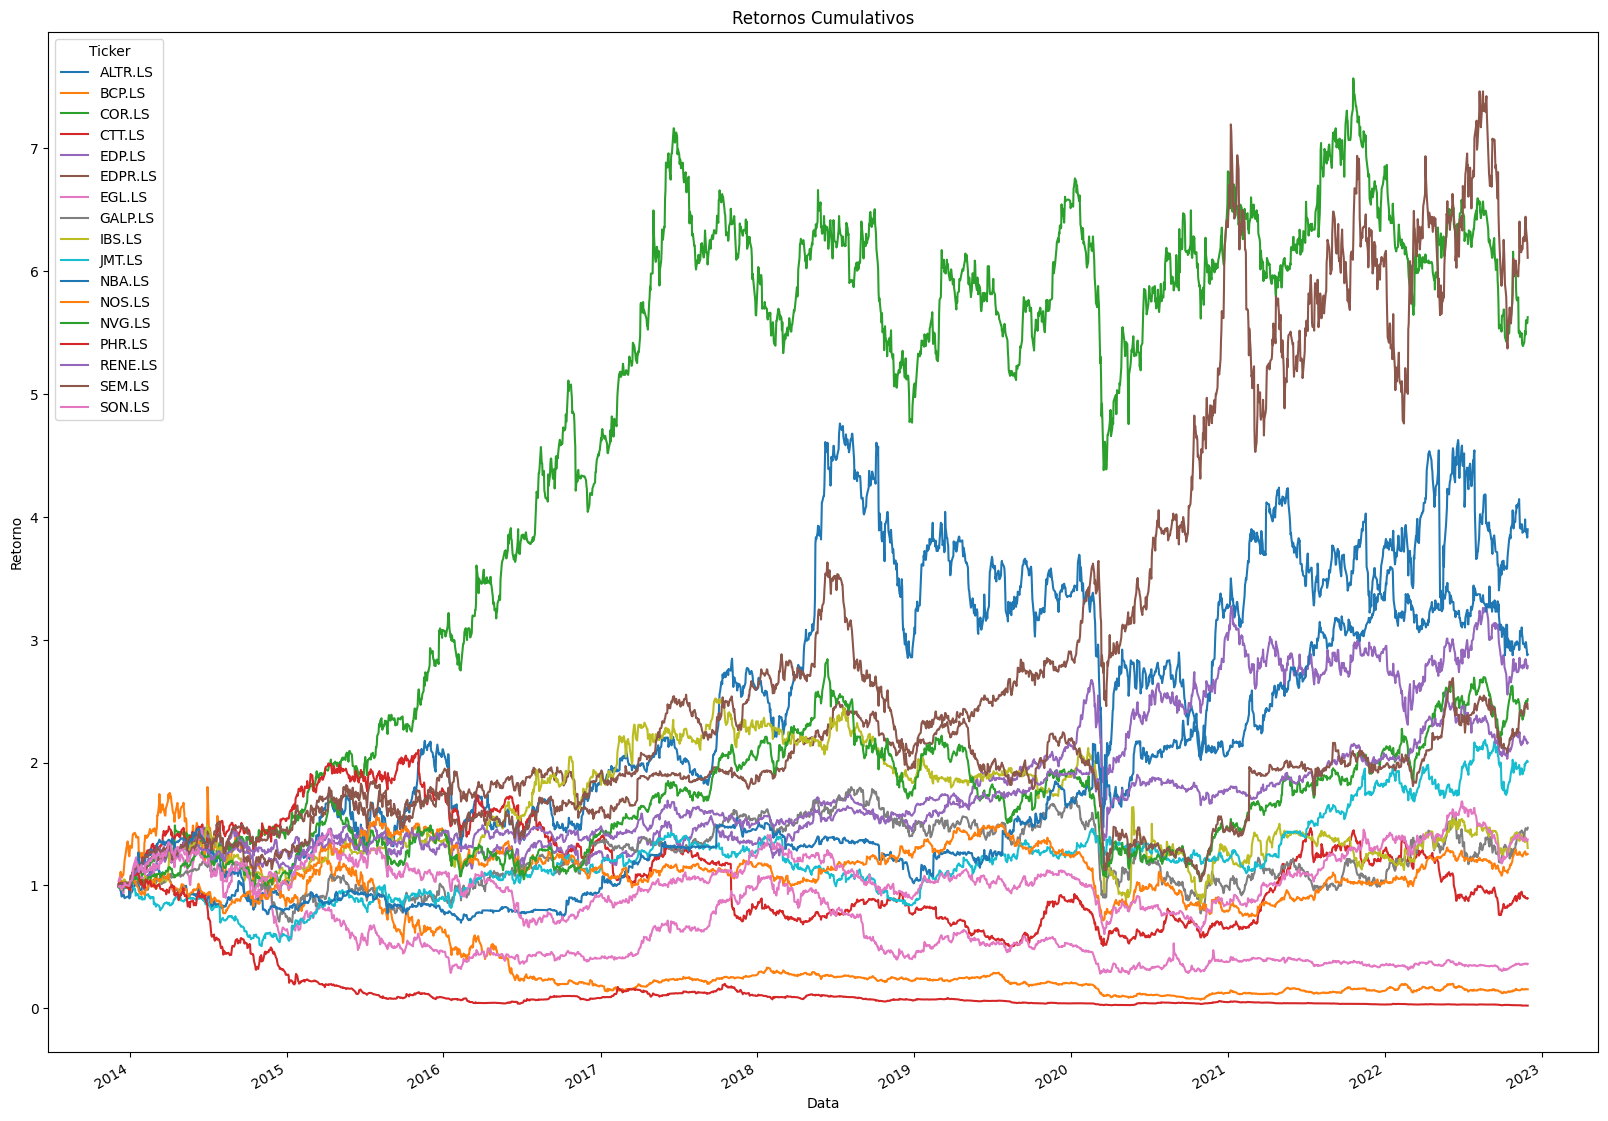

In [90]:
# 2.6) - Faz um gráfico com os retornos cumulativos de todas as ações no mesmo plano
# create a dataframe with the cumulative returns
df_cum_returns = (1 + df_returns).cumprod()
df_cum_returns.head()

# plot the cumulative returns
df_cum_returns.plot(figsize=(20,15))
#labels
plt.title('Retornos Cumulativos') # add a title
plt.xlabel('Data') # add x labels
plt.ylabel('Retorno') # add y labels
plt.legend(title='Ticker') # add a legend
plt.show()


### 2.7) - (1.0 pts) Faz gráficos dos histogramas dos retornos por acções
- Utiliza uma figura para todos os gráficos com 4 subplots por linha
- Define o titlo de cada gráfico como o ticker
- Utiliza a mesma escala para o x e y

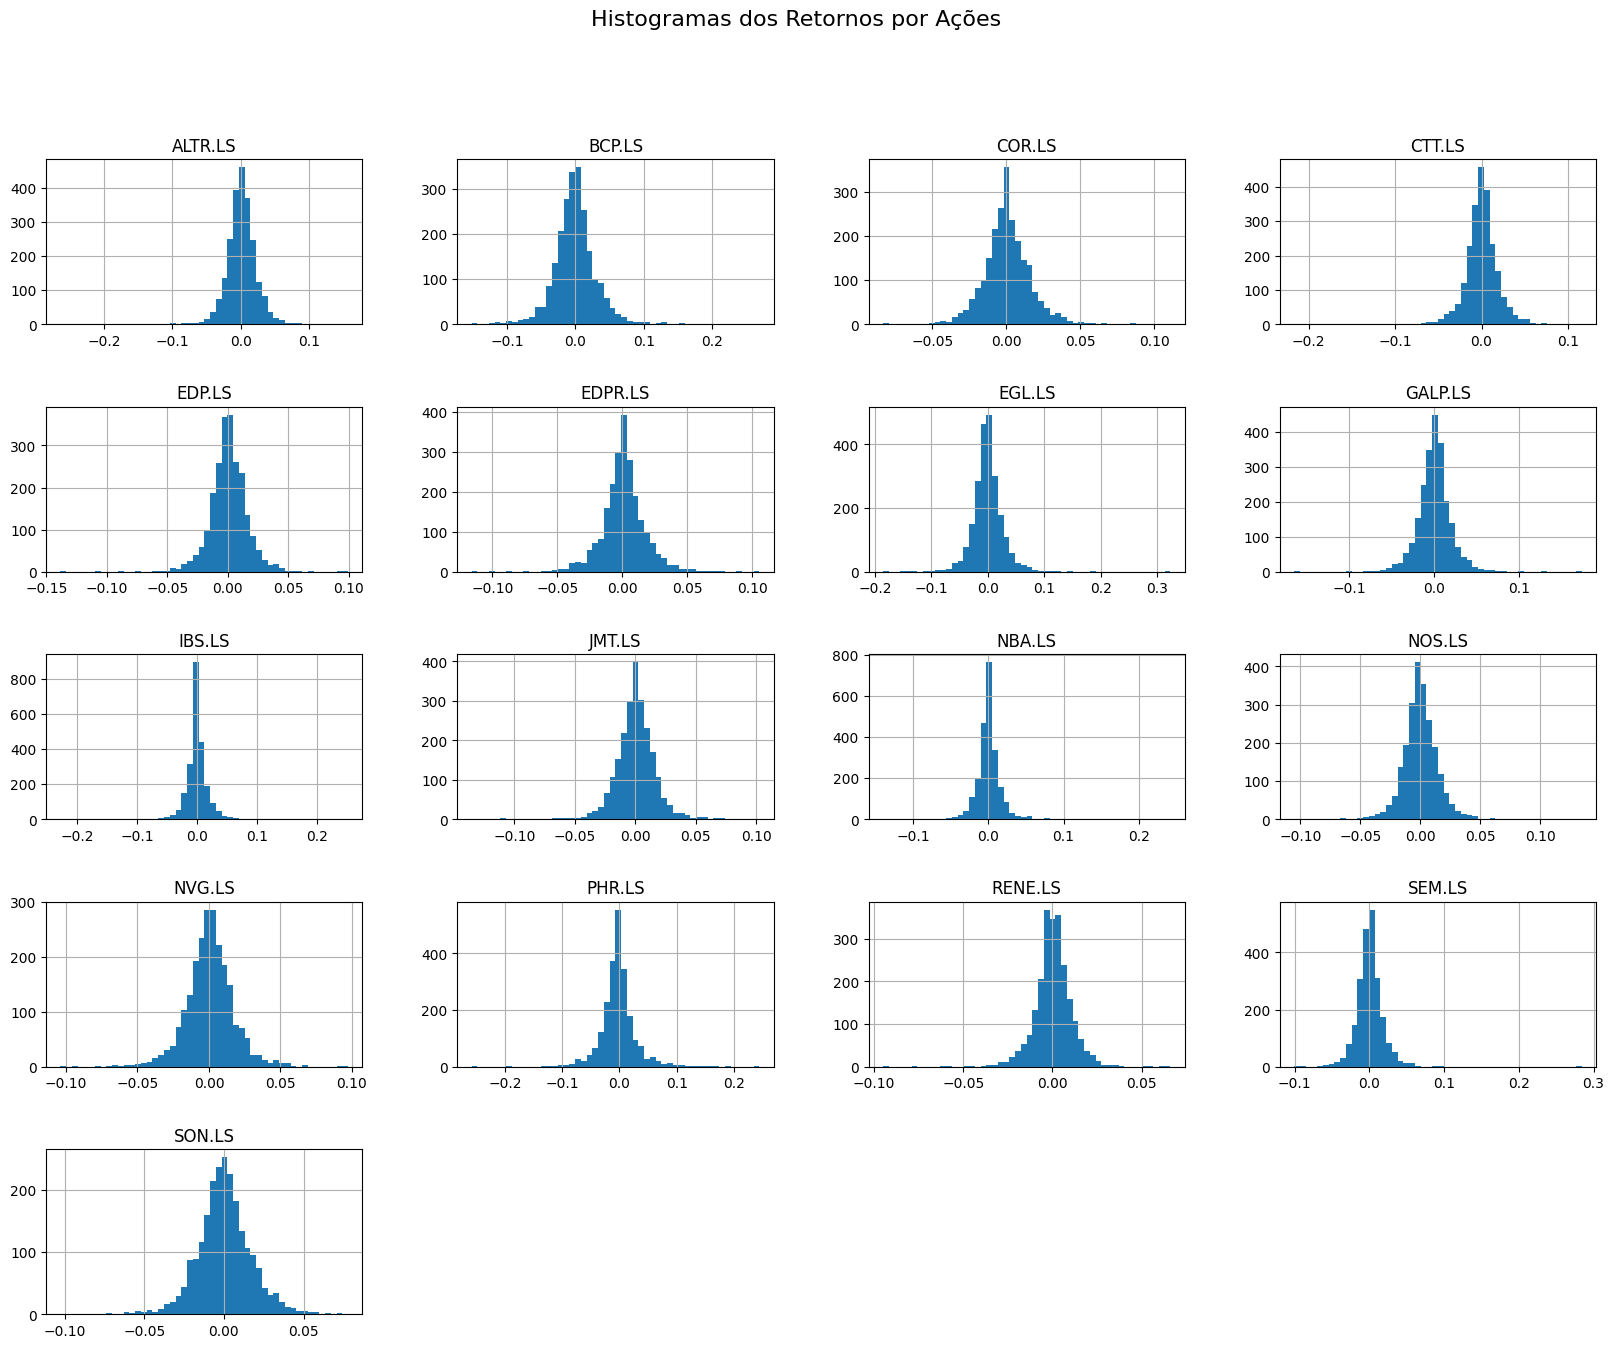

In [92]:
"""
### 2.7) - (1.0 pts) Faz gráficos dos histogramas dos retornos por acções
- Utiliza uma figura para todos os gráficos com 4 subplots por linha
- Define o titlo de cada gráfico como o ticker
- Utiliza a mesma escala para o x e y
"""

# plot the returns
df_returns.hist(bins=50, figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histogramas dos Retornos por Ações', fontsize=16)
plt.axis('equal')
plt.show()


### 2.8) - (1.0 pts) Cria uma matriz de correlações dos returnos

In [95]:
# 2.8) - Cria uma matriz de correlações dos returnos
# create a correlation matrix
corr_matrix = df_returns.corr()
corr_matrix

,ALTR.LS,BCP.LS,COR.LS,CTT.LS,EDP.LS,EDPR.LS,EGL.LS,GALP.LS,IBS.LS,JMT.LS,NBA.LS,NOS.LS,NVG.LS,PHR.LS,RENE.LS,SEM.LS,SON.LS
ALTR.LS,1.000000,0.384905,0.269337,0.337676,0.340872,0.308078,0.366369,0.390262,0.125666,0.276936,0.191146,0.371465,0.648718,0.226273,0.345542,0.500224,0.477636
BCP.LS,0.384905,1.000000,0.197345,0.341100,0.275928,0.230368,0.364358,0.348881,0.121842,0.226540,0.176913,0.316472,0.411429,0.236275,0.282090,0.352212,0.451222
COR.LS,0.269337,0.197345,1.000000,0.210985,0.190097,0.177589,0.224791,0.191001,0.130856,0.148641,0.168380,0.218444,0.293148,0.103449,0.215608,0.238084,0.213725
CTT.LS,0.337676,0.341100,0.210985,1.000000,0.301560,0.249370,0.338977,0.298746,0.112602,0.224400,0.158312,0.333118,0.390075,0.173380,0.304434,0.328698,0.387995
EDP.LS,0.340872,0.275928,0.190097,0.301560,1.000000,0.643011,0.310812,0.325032,0.103984,0.322712,0.164406,0.324716,0.373438,0.180079,0.529708,0.317608,0.389116
EDPR.LS,0.308078,0.230368,0.177589,0.249370,0.643011,1.000000,0.239161,0.227339,0.090925,0.264243,0.150736,0.275859,0.303621,0.140861,0.448105,0.272634,0.306044
EGL.LS,0.366369,0.364358,0.224791,0.338977,0.310812,0.239161,1.000000,0.361027,0.095630,0.245215,0.144694,0.370364,0.422659,0.248506,0.272717,0.352766,0.440565
GALP.LS,0.390262,0.348881,0.191001,0.298746,0.325032,0.227339,0.361027,1.000000,0.149489,0.258389,0.154011,0.318239,0.421624,0.196223,0.310456,0.343709,0.397558
IBS.LS,0.125666,0.121842,0.130856,0.112602,0.103984,0.090925,0.095630,0.149489,1.000000,0.105205,0.100368,0.087554,0.142799,0.108831,0.159319,0.145938,0.157868
JMT.LS,0.276936,0.226540,0.148641,0.224400,0.322712,0.264243,0.245215,0.258389,0.105205,1.000000,0.128819,0.243083,0.307028,0.155851,0.291035,0.238851,0.384844


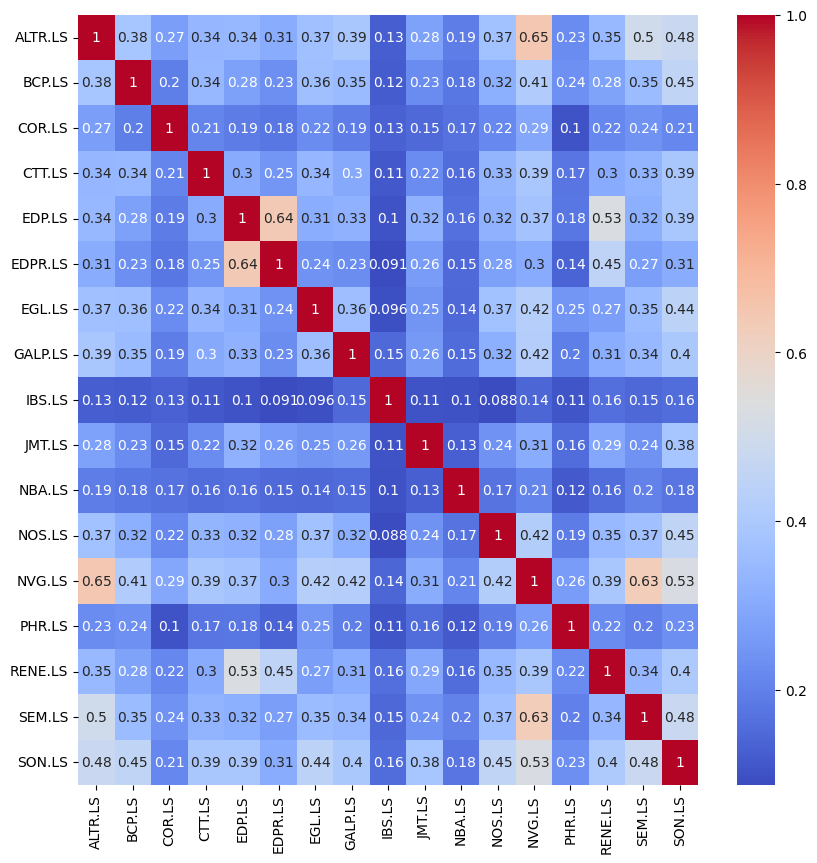

In [97]:
#plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [103]:
#column 
df_returns.columns

Index(['ALTR.LS', 'BCP.LS', 'COR.LS', 'CTT.LS', 'EDP.LS', 'EDPR.LS', 'EGL.LS',
       'GALP.LS', 'IBS.LS', 'JMT.LS', 'NBA.LS', 'NOS.LS', 'NVG.LS', 'PHR.LS',
       'RENE.LS', 'SEM.LS', 'SON.LS'],
      dtype='object')

### 2.9) - (1.0 pts) Grava dos dados (Adj Close Price and Volume) para um ficherio CSV separado para cada ticker

In [115]:
#2.9) - Grava dos dados (Adj Close Price and Volume) para um ficherio CSV separado para cada ticker
# save the data to a csv file
df_data.to_csv('data.csv')

# save the returns to a csv file
df_returns.to_csv('returns.csv')
for ticker in df_returns.columns:
    df_returns[[ticker]].to_csv(ticker + '_returns.csv')

# save the cumulative returns to a csv file
df_cum_returns.to_csv('cum_returns.csv')
for ticker in df_cum_returns.columns:
    df_cum_returns[[ticker]].to_csv(ticker + '_cum_returns.csv')

# save the correlation matrix to a csv file
corr_matrix.to_csv('corr_matrix.csv')

### 2.10) - (1.0 pts) Lê os dados dos ficheiros CSV files que acabaste de gravar para um único DataFrame com os preços de cada ticker

In [116]:
### 2.10) Lê os dados dos ficheiros CSV files que acabaste de gravar para um único DataFrame com os preços de cada ticker

# read the data from the csv file
df_data_csv = pd.read_csv('data.csv', index_col=0, parse_dates=True)
df_data_csv


,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,Adj Close.9,...,Volume.7,Volume.8,Volume.9,Volume.10,Volume.11,Volume.12,Volume.13,Volume.14,Volume.15,Volume.16
NaN,ALTR.LS,BCP.LS,COR.LS,CTT.LS,EDP.LS,EDPR.LS,EGL.LS,GALP.LS,IBS.LS,JMT.LS,...,GALP.LS,IBS.LS,JMT.LS,NBA.LS,NOS.LS,NVG.LS,PHR.LS,RENE.LS,SEM.LS,SON.LS
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-05,1.4236619472503662,0.9877243041992188,1.6141347885131836,3.551051139831543,1.5869542360305786,3.5575432777404785,3.438283681869507,7.887458801269531,4.155571460723877,10.628454208374023,...,2300839,0,557965,6419,734397,212811,3911292,156871,113168,6565052
2013-12-06,1.4435529708862305,0.9965363144874573,1.6000988483428955,3.5446407794952393,1.5763158798217773,3.522721529006958,3.561974287033081,7.894247055053711,4.136908531188965,10.543368339538574,...,1350725,151,648952,7423,379436,72229,3726446,70544,24867,3281577
2013-12-09,1.417978286743164,1.0428017377853394,1.6141347885131836,3.7305257320404053,1.5899094343185425,3.530249834060669,3.678619623184204,7.880672931671143,4.136908531188965,10.746838569641113,...,1278756,750,563582,21840,472833,77878,2974699,278475,188360,2321901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,5.664999961853027,0.1525000035762787,8.899999618530273,3.2149999141693115,4.480999946594238,22.700000762939453,1.2480000257492065,11.399999618530273,5.78000020980835,21.020000457763672,...,2557175,8102,603985,993,247515,1213456,407626,851173,9561,2030451
2022-11-24,5.525000095367432,0.15279999375343323,8.850000381469727,3.184999942779541,4.511000156402588,22.920000076293945,1.24399995803833,11.5600004196167,5.78000020980835,21.239999771118164,...,1301411,0,469955,2102,162507,1017045,504556,326401,10664,1916789
2022-11-25,5.550000190734863,0.15539999306201935,9.039999961853027,3.184999942779541,4.4770002365112305,22.59000015258789,1.25,11.520000457763672,5.699999809265137,21.239999771118164,...,1617660,40,422330,10886,403925,1397468,605958,417975,4604,1599013
2022-11-28,5.454999923706055,0.15209999680519104,9.0,3.1649999618530273,4.388000011444092,22.149999618530273,1.2300000190734863,11.46500015258789,5.619999885559082,21.420000076293945,...,2415985,3225,515014,892,246106,817913,358263,812159,6453,2058803


### 2.11) (1.0 pts) -  Agrupa o volume de cada ação por ano, mes

In [119]:
### 2.11) (1.0 pts) -  Agrupa o volume de cada ação por ano, mes
# group the volume by year and month
date=df_data_csv.iloc[2:,:]
date





,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,Adj Close.9,...,Volume.7,Volume.8,Volume.9,Volume.10,Volume.11,Volume.12,Volume.13,Volume.14,Volume.15,Volume.16
2013-12-05,1.4236619472503662,0.9877243041992188,1.6141347885131836,3.551051139831543,1.5869542360305786,3.5575432777404785,3.438283681869507,7.887458801269531,4.155571460723877,10.628454208374023,...,2300839,0,557965,6419,734397,212811,3911292,156871,113168,6565052
2013-12-06,1.4435529708862305,0.9965363144874573,1.6000988483428955,3.5446407794952393,1.5763158798217773,3.522721529006958,3.561974287033081,7.894247055053711,4.136908531188965,10.543368339538574,...,1350725,151,648952,7423,379436,72229,3726446,70544,24867,3281577
2013-12-09,1.417978286743164,1.0428017377853394,1.6141347885131836,3.7305257320404053,1.5899094343185425,3.530249834060669,3.678619623184204,7.880672931671143,4.136908531188965,10.746838569641113,...,1278756,750,563582,21840,472833,77878,2974699,278475,188360,2321901
2013-12-10,1.37080717086792,1.0890673398971558,1.60711669921875,3.6536080837249756,1.5881366729736328,3.5293092727661133,3.583111524581909,7.880672931671143,4.136908531188965,10.728342056274414,...,1355479,750,499046,10135,553785,145170,3017922,114096,14089,2995881
2013-12-11,1.3588722944259644,1.09787917137146,1.6000988483428955,3.698476791381836,1.5763158798217773,3.57730770111084,3.512655258178711,7.928187847137451,4.168013095855713,10.580363273620605,...,1871549,13792,488399,10063,424096,160762,3642731,157661,95285,2057487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,5.664999961853027,0.1525000035762787,8.899999618530273,3.2149999141693115,4.480999946594238,22.700000762939453,1.2480000257492065,11.399999618530273,5.78000020980835,21.020000457763672,...,2557175,8102,603985,993,247515,1213456,407626,851173,9561,2030451
2022-11-24,5.525000095367432,0.15279999375343323,8.850000381469727,3.184999942779541,4.511000156402588,22.920000076293945,1.24399995803833,11.5600004196167,5.78000020980835,21.239999771118164,...,1301411,0,469955,2102,162507,1017045,504556,326401,10664,1916789
2022-11-25,5.550000190734863,0.15539999306201935,9.039999961853027,3.184999942779541,4.4770002365112305,22.59000015258789,1.25,11.520000457763672,5.699999809265137,21.239999771118164,...,1617660,40,422330,10886,403925,1397468,605958,417975,4604,1599013
2022-11-28,5.454999923706055,0.15209999680519104,9.0,3.1649999618530273,4.388000011444092,22.149999618530273,1.2300000190734863,11.46500015258789,5.619999885559082,21.420000076293945,...,2415985,3225,515014,892,246106,817913,358263,812159,6453,2058803


### 2.11) - (1.0 pts) Faz um gráfico de barras com o montante por mês por ação

- Um único gráfico
- Eixo do X tem 12 valores (meses)

2

## 3. (3.0 pts) Otimização: Com a seguinte informação de 5 obrigações (maturidade, cupão, preço), encontre os fatores de disconto

### 3.1) (1.5 pts) Utilizando operações matriciais (Numpy)

### 3.2) (1.5 pts) Utilizando otimização (encontrar o vector de dfs que faz com que os cashflows multiplicados pelos dfs sejam igual aos preços)